<a href="https://colab.research.google.com/github/gerkibz/Knowledge-discovery-MIning/blob/main/Kidney_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings(action='ignore')
from google.colab import drive

In [ ]:
#Link drive to my colab notebook
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import the data
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/kidney_disease.csv")


In [ ]:

data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
#drop the extra id column
for i in data.drop("id",axis=1).columns:
    print('unique values in "{}":\n'.format(i),data[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "rbc":
 [nan 'normal' 'abnormal']
unique values in "pc":
 ['normal' 'abnormal' nan]
unique values in "pcc":
 ['notpresent' 'present' nan]
unique values in "ba":
 ['notpresent' 'present' nan]
unique values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
#change the typos
for i in range(data.shape[0]):
    if data.iloc[i,25]=='ckd\t':
        data.iloc[i,25]='ckd'
    if data.iloc[i,20] in [' yes','\tyes']:
        data.iloc[i,20]='yes'
    if data.iloc[i,20]=='\tno':
        data.iloc[i,20]='no'
    if data.iloc[i,21]=='\tno':
        data.iloc[i,21]='no'
    if data.iloc[i,16]=='\t?':
        data.iloc[i,16]=np.nan
    if data.iloc[i,16]=='\t43':
        data.iloc[i,16]='43'
    if data.iloc[i,17]=='\t?':
        data.iloc[i,17]=np.nan
    if data.iloc[i,17]=='\t6200':
        data.iloc[i,17]= '6200'
    if data.iloc[i,17]=='\t8400':
        data.iloc[i,17]= '6200'
    if data.iloc[i,18]=='\t?':
        data.iloc[i,18]=np.nan
    if data.iloc[i,25]=='ckd':
        data.iloc[i,25]='1'
    if data.iloc[i,25]=='notckd':
        data.iloc[i,25]='0'

In [ ]:
#Drop the extra ID column
data.drop('id',axis=1,inplace=True)
data.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,1


In [ ]:
#Change to numerals
data['rbc'] = data.rbc.replace(['normal','abnormal'], ['1', '0'])
data['pc'] = data.pc.replace(['normal','abnormal'], ['1', '0'])
data['pcc'] = data.pcc.replace(['present','notpresent'], ['1', '0'])
data['ba'] = data.ba.replace(['present','notpresent'], ['1', '0'])
data['htn'] = data.htn.replace(['yes','no'], ['1', '0'])
data['dm'] = data.dm.replace(['yes','no'], ['1', '0'])
data['cad'] = data.cad.replace(['yes','no'], ['1', '0'])
data['appet'] = data.appet.replace(['good','poor'], ['1', '0'])
data['pe'] = data.pe.replace(['yes','no'], ['1', '0'])
data['ane'] = data.ane.replace(['yes','no'], ['1', '0'])

data.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,1,0,0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,1,0,0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0,0,0,1,0,0,1


In [ ]:
# Check for mistypes
for i in data.columns:
    print("unique values in {}:\n".format(i),data[i].unique())

unique values in age:
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in bp:
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in sg:
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in al:
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in su:
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in rbc:
 [nan '1' '0']
unique values in pc:
 ['1' '0' nan]
unique values in pcc:
 ['0' '1' nan]
unique values in ba:
 ['0' '1' nan]
unique values in bgr:
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 25

In [ ]:
data.info

<bound method DataFrame.info of       age    bp     sg   al   su  rbc pc  ... htn dm  cad  appet  pe  ane  classification
0    48.0  80.0  1.020  1.0  0.0  NaN  1  ...   1  1    0      1   0    0               1
1     7.0  50.0  1.020  4.0  0.0  NaN  1  ...   0  0    0      1   0    0               1
2    62.0  80.0  1.010  2.0  3.0    1  1  ...   0  1    0      0   0    1               1
3    48.0  70.0  1.005  4.0  0.0    1  0  ...   1  0    0      0   1    1               1
4    51.0  80.0  1.010  2.0  0.0    1  1  ...   0  0    0      1   0    0               1
..    ...   ...    ...  ...  ...  ... ..  ...  .. ..  ...    ...  ..  ...             ...
395  55.0  80.0  1.020  0.0  0.0    1  1  ...   0  0    0      1   0    0               0
396  42.0  70.0  1.025  0.0  0.0    1  1  ...   0  0    0      1   0    0               0
397  12.0  80.0  1.020  0.0  0.0    1  1  ...   0  0    0      1   0    0               0
398  17.0  60.0  1.025  0.0  0.0    1  1  ...   0  0    0      1   0

In [ ]:
#separate categorical and numerical data for further processing on each
categoricals=[]
for col in data.columns:
    if not col in numeric:
        categoricals.append(col)
categoricals.remove('classification')

In [ ]:
categoricals

['rbc', 'pc', 'pcc', 'ba', 'pcv', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [ ]:
numeric

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'wc',
 'rc']

In [ ]:
import matplotlib.style as style
style.use('fivethirtyeight')


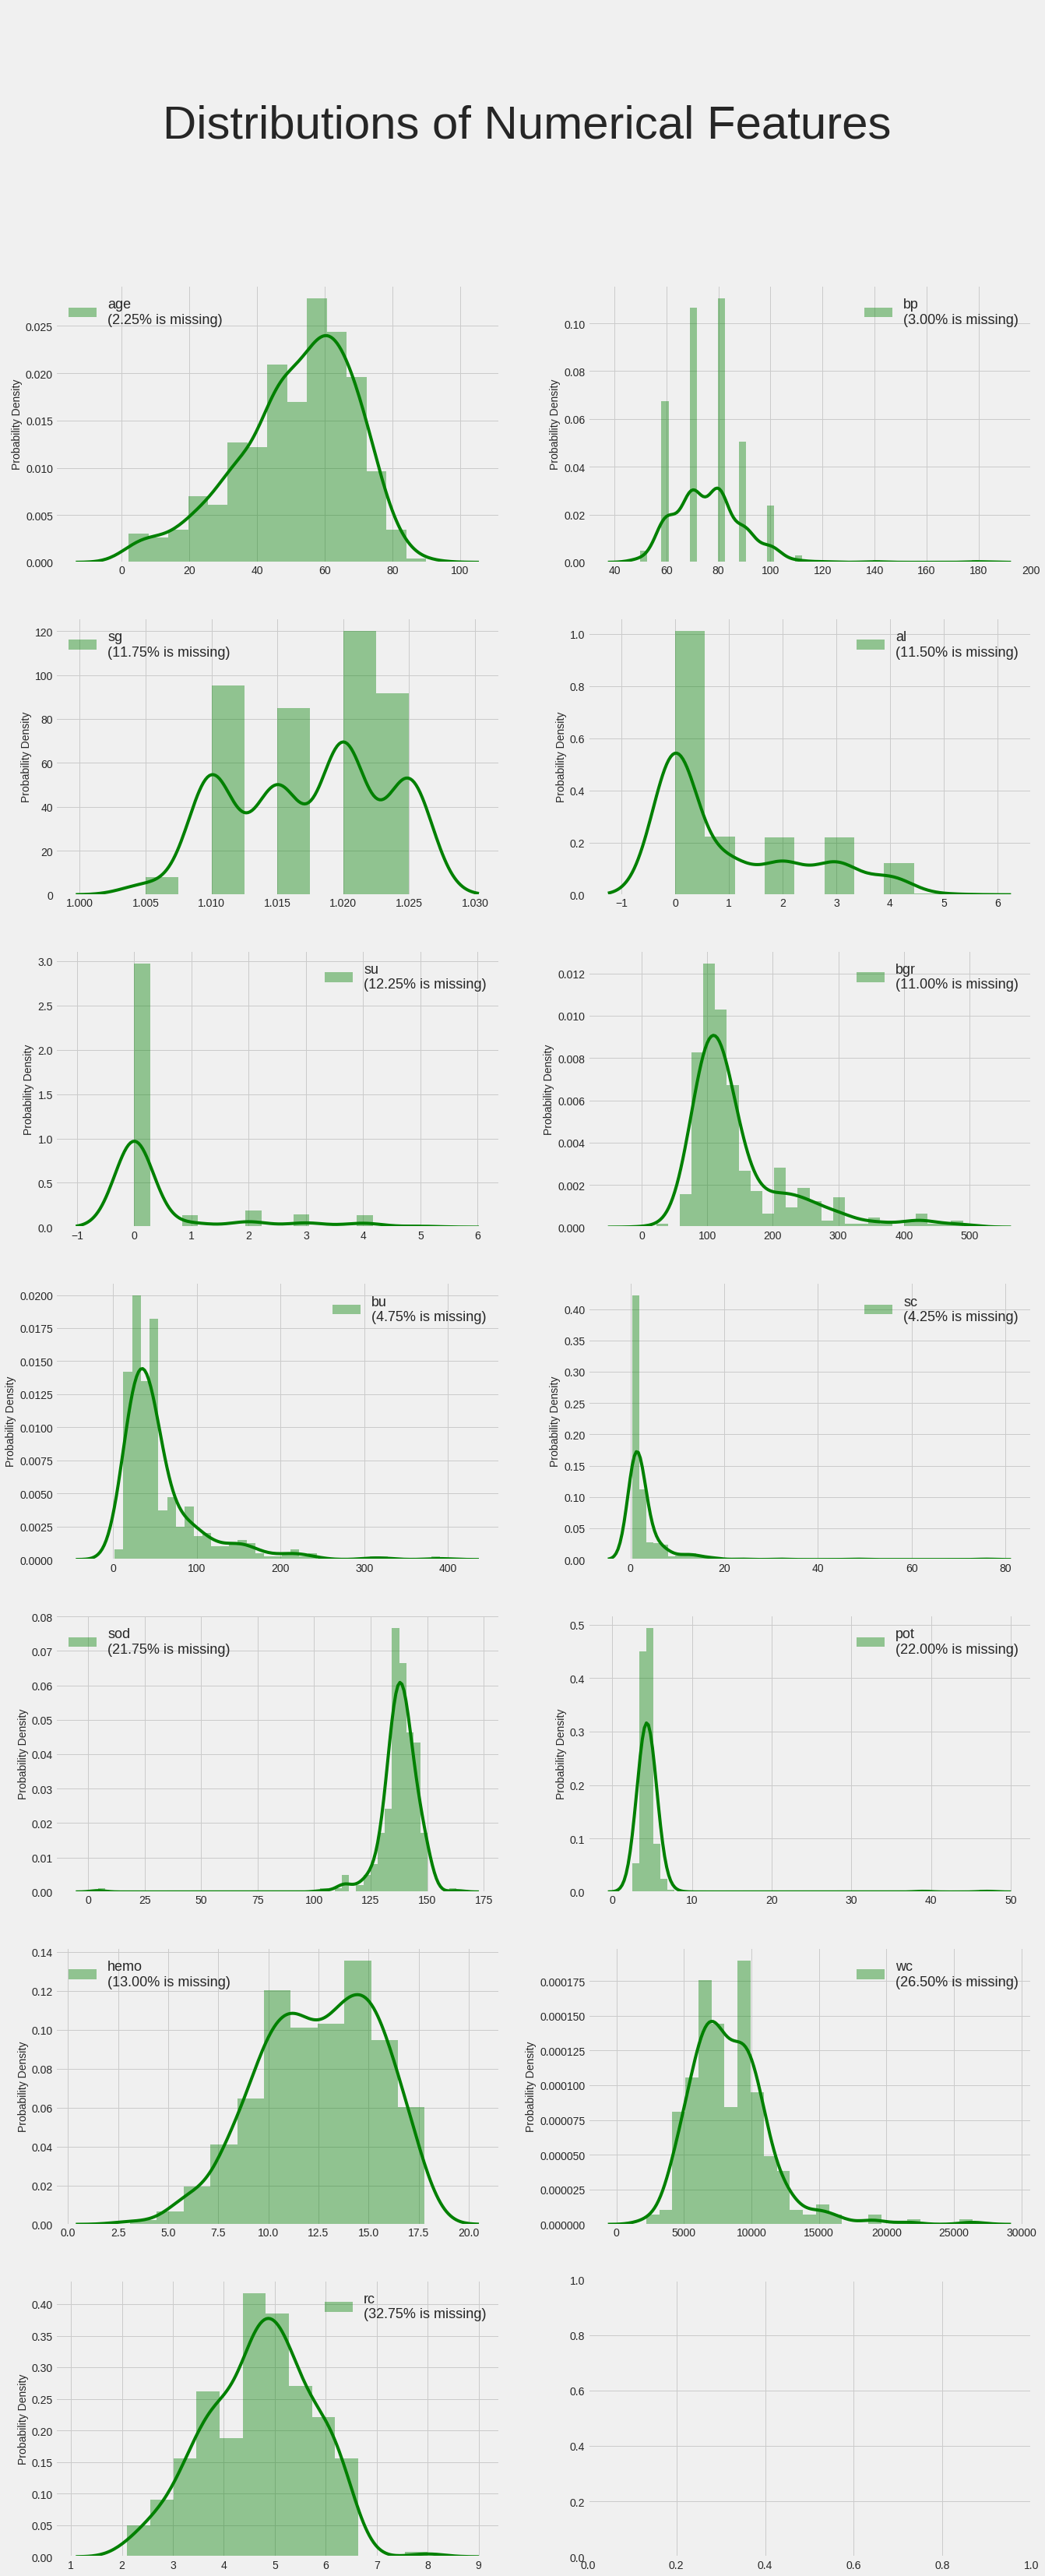

In [ ]:
n_rows, n_cols = (7,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 50))
figure.suptitle('\n\nDistributions ', fontsize=60)

for index, column in enumerate(numeric):
    
    i,j = (index // n_cols), (index % n_cols)
    
    miss_perc="%.2f"%(100*(1-(data[column].dropna().shape[0])/data.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig=sns.distplot(data[column], color="g", label=collabel, norm_hist=True,
    
    ax=axes[i,j], kde_kws={"lw":4})
    
    fig=fig.legend(loc='best', fontsize=18)
    
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    
    axes[i,j].set_xlabel(None)

plt.show()



In [ ]:
data.isnull().sum()


age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
mean_values=data[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc','pcc','ba','bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']].median()
data[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc','pcc','ba','bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']] = data[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc','pcc','ba','bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']].fillna(value=data[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc','pcc','ba','bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']].median())
data.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='RdBu_r')

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
age,1.000000,0.136316,-0.160374,0.085918,0.186750,0.230731,0.194291,0.133985,-0.086040,0.049399,-0.178308
bp,0.136316,1.000000,-0.166980,0.123518,0.189561,0.150180,0.180841,0.143184,-0.100705,0.063667,-0.279303
sg,-0.160374,-0.166980,1.000000,-0.479962,-0.292053,-0.299413,-0.244995,-0.171998,0.210791,-0.052935,0.490699
al,0.085918,0.123518,-0.479962,1.000000,0.287751,0.293150,0.347418,0.161310,-0.225612,0.107893,-0.474399
su,0.186750,0.189561,-0.292053,0.287751,1.000000,0.627002,0.126897,0.096434,-0.051758,0.177396,-0.156807
bgr,0.230731,0.150180,-0.299413,0.293150,0.627002,1.000000,0.118859,0.068886,-0.130569,0.052732,-0.254435
bu,0.194291,0.180841,-0.244995,0.347418,0.126897,0.118859,1.000000,0.581517,-0.308806,0.339771,-0.541635
sc,0.133985,0.143184,-0.171998,0.161310,0.096434,0.068886,0.581517,1.000000,-0.624036,0.204751,-0.342492
sod,-0.086040,-0.100705,0.210791,-0.225612,-0.051758,-0.130569,-0.308806,-0.624036,1.000000,0.069612,0.331483
pot,0.049399,0.063667,-0.052935,0.107893,0.177396,0.052732,0.339771,0.204751,0.069612,1.000000,-0.096428


In [ ]:
#one-hot file loading
def load(data):
    raw_data = data
    #Create a data frame for column storage
    processed_columns = pd.DataFrame({})
    for col in raw_data:
        #col_datatype = raw_data[col].dtype
        #Check the column for dtype object or unique value < 7
        if raw_data[col].dtype == 'object' or raw_data[col].nunique() < 7:
            df = pd.get_dummies(raw_data[col], prefix=col)
            processed_columns = pd.concat([processed_columns, df], axis=1)
        else:
            processed_columns = pd.concat([processed_columns, raw_data[col]], axis=1)
    return processed_columns
X = data
Y = data.loc[:,['classification']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=False)
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [ ]:
data.isnull().any()

age               False
bp                False
sg                False
al                False
su                False
rbc               False
pc                False
pcc               False
ba                False
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv               False
wc                False
rc                False
htn               False
dm                False
cad               False
appet             False
pe                False
ane               False
classification    False
dtype: bool

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X_train, y_train)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

ValueError: ignored

In [ ]:
n_rows, n_cols = (3,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 80))
figure.suptitle('\n\nK-Means Clusters Vs Target Variable', fontsize=60)

for index in range(6):
    
    i,j = (index // n_cols), (index % n_cols)
    
    model=KMeans(n_clusters=index+2)
    
    model.fit(scaled_data)
    
    cluster_labels=model.predict(scaled_data)
    
    sns.heatmap(pd.crosstab(cluster_labels,Y),
                ax=axes[i,j],
                cmap='Greens',
                square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':90},
                fmt='d')
    
    axes[i,j].set_xlabel("Chronic Kidney Disease",fontsize=30)

    axes[i,j].set_ylabel("Cluster Labels",fontsize=30)
    
    axes[i,j].set_yticklabels(axes[i,j].get_yticklabels(),fontsize=20)
    
    axes[i,j].set_xticklabels(["No","Yes"],fontsize=20)
plt.show()
